In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [42]:
df = pd.read_csv(r"C:\Users\india\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [43]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data cleaning

In [46]:
df = df.drop(columns = ['customerID'], axis = 1)

In [47]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [48]:
df[df['TotalCharges'].str.contains(' ')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [49]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [50]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['TotalCharges'] = df['TotalCharges'].astype('float32')

In [51]:
#imputer = SimpleImputer(strategy='most_frequent')
#df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

In [52]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Data Visualization

<Axes: xlabel='gender'>

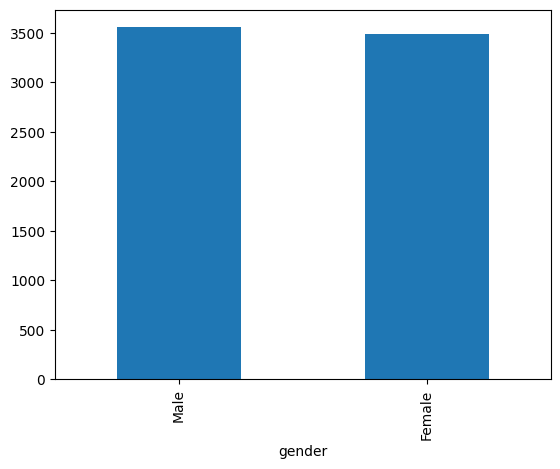

In [206]:
df['gender'].value_counts().plot(kind = 'bar')

* male are 3555 and female are 3488

In [212]:
df.groupby(['Churn', 'gender']).size()

Churn  gender
No     Female    2549
       Male      2625
Yes    Female     939
       Male       930
dtype: int64

* More females and males have churn status as 'No'

<Axes: ylabel='Density'>

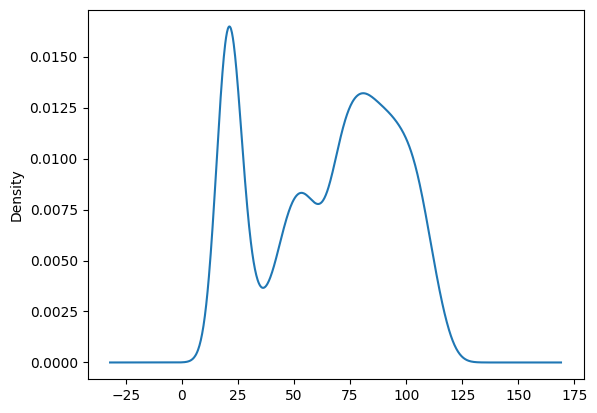

In [216]:
df['MonthlyCharges'].plot(kind = 'kde')

<Axes: >

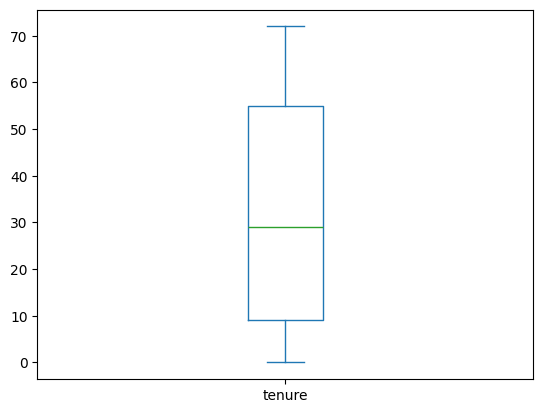

In [218]:
df['tenure'].plot(kind = 'box')

## Splitting the data

In [115]:
X = df.drop(columns= 'Churn')
y = df['Churn']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Separating Categorical and Numerical

In [146]:
from sklearn.metrics import accuracy_score

cat = X_train.select_dtypes(include='object').columns
num = X_train.select_dtypes(include=['integer', 'float']).columns

cat_transformation = Pipeline([
    ('encoding', OneHotEncoder())
])

num_transformation = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaling', StandardScaler())
])

preprocess = ColumnTransformer([
    ('Categorical', cat_transformation, cat),
    ('Numerical', num_transformation, num)
], remainder='passthrough')

In [190]:
knn = Pipeline([
    ("Preprocessing", preprocess),
    ('selector', SelectKBest(k=7)),  # Select top 6 features
    ("KNNClassification", KNeighborsClassifier())
])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.7778566359119943


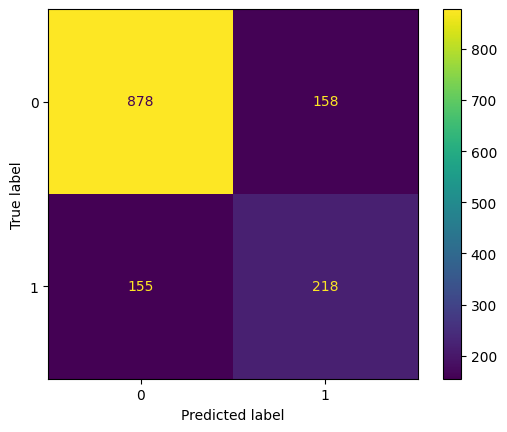

In [191]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [192]:
nb =  Pipeline([
    ("Preprocessing", preprocess),
    ('selector', SelectKBest(k=6)),
    ("GaussianNB", GaussianNB()),
])   
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(" GaussianNB Accuracy:", accuracy)

 GaussianNB Accuracy: 0.7381121362668559


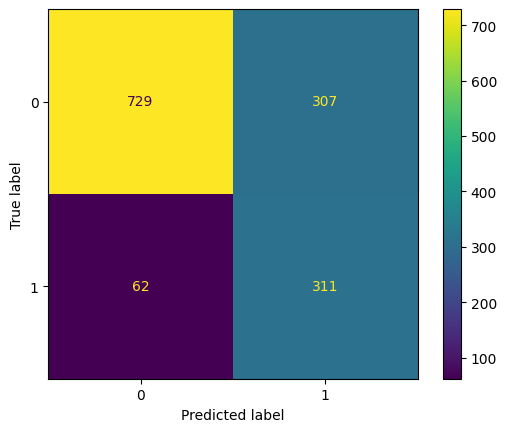

In [193]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [194]:
dt =  Pipeline([
     ("Preprocessing", preprocess),
    ('selector', SelectKBest(k=5)),
    ("DecisionTree", DecisionTreeClassifier()),
])   
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("DecisionTree Accuracy:", accuracy)

DecisionTree Accuracy: 0.7920511000709723


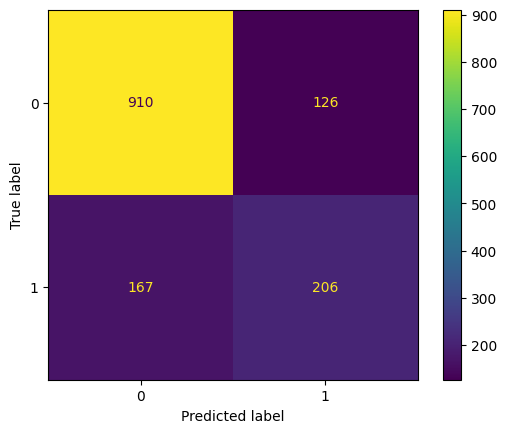

In [195]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [196]:
rf =  Pipeline([
     ("Preprocessing", preprocess),
    ('selector', SelectKBest(k=6)),
    ("RandomForest", RandomForestClassifier()),
])   
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("RandomForest Accuracy:", accuracy)

RandomForest Accuracy: 0.7806955287437899


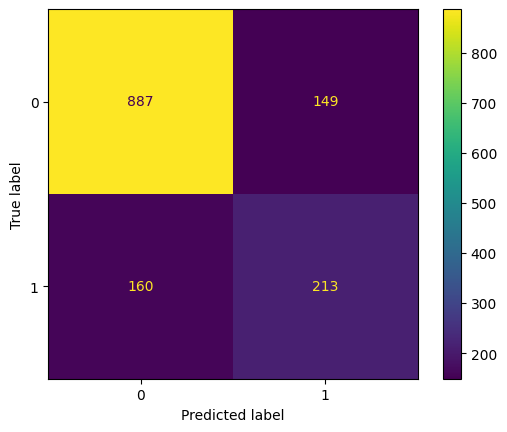

In [197]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [172]:
selected_feature_indices = dt.named_steps['selector'].get_support(indices=True)
selected_feature_names = [column_names_after_preprocessing[i] for i in selected_feature_indices]

In [173]:
selected_feature_names

['Categorical__InternetService_Fiber optic',
 'Categorical__OnlineSecurity_No',
 'Categorical__TechSupport_No',
 'Categorical__Contract_Month-to-month',
 'Numerical__tenure']

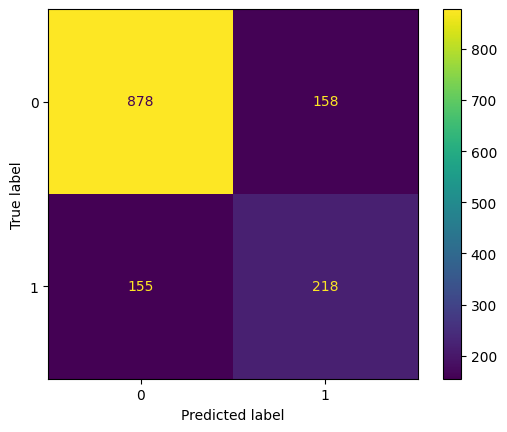

In [185]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [176]:
import os

In [178]:
os.getcwd()

'C:\\Users\\india\\My Python Files\\Machine Learning Phase 2'

In [ ]:
pickle.dum()

In [186]:
pickle.dump(knn, open('KNN churn prediction', 'wb'))

In [187]:
pickle.dump(dt, open('DecisionTree churn prediction', 'wb'))

In [188]:
pickle.dump(rf, open('RandomForest churn prediction', 'wb'))

In [189]:
pickle.dump(nb, open('NaiveBayes churn prediction', 'wb'))